In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [14]:
!pip install missingno 

In [15]:
test=pd.read_csv('test_2v.csv')

In [16]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [17]:
train=pd.read_csv('train_2v.csv')

In [18]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [19]:
test.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

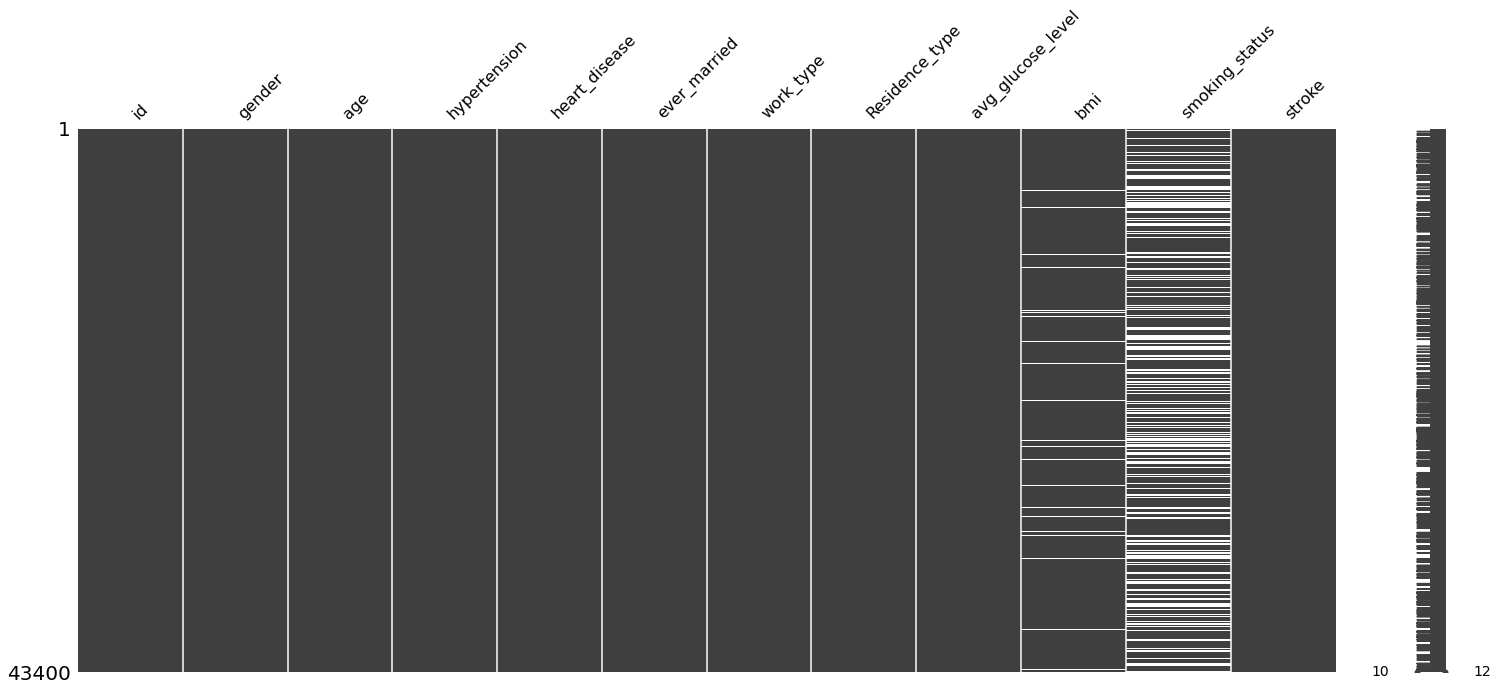

In [20]:
ms.matrix(train);

In [21]:
test=test.dropna(axis=0, how='any')
print('Test data Shape {}'.format(test.shape))

Test data Shape (12423, 11)


<AxesSubplot:>

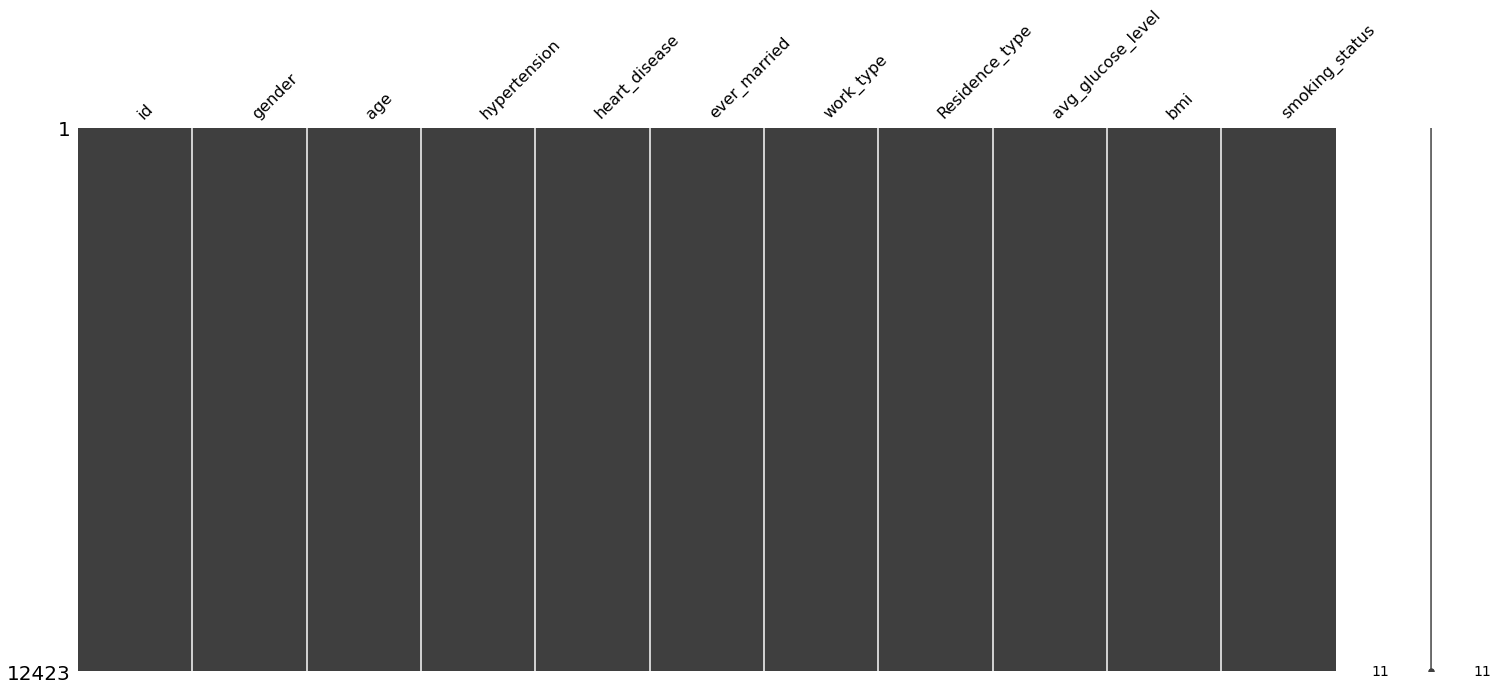

In [22]:
ms.matrix(test)

In [23]:
train=train.dropna(axis=0, how='any')
print('train data shape  {}'.format(train.shape))

train data shape  (29072, 12)


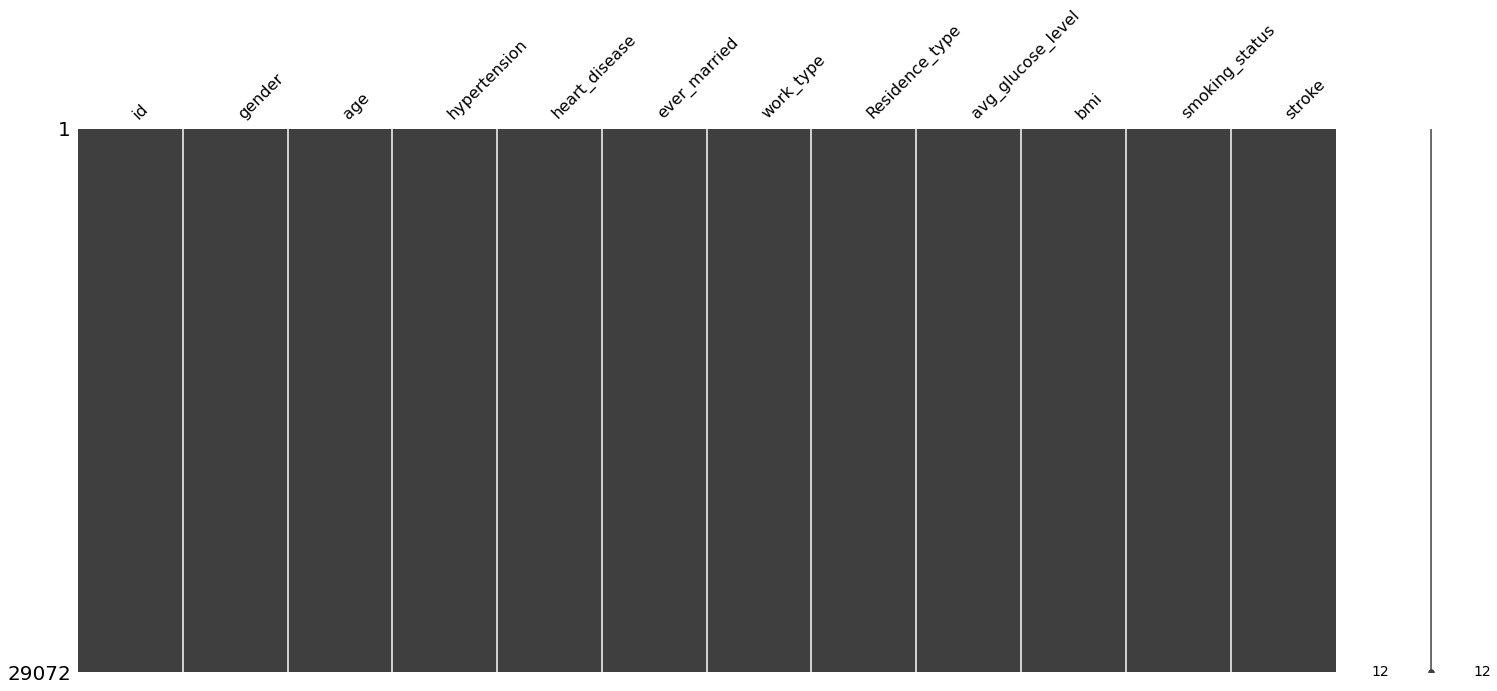

In [24]:
ms.matrix(train);

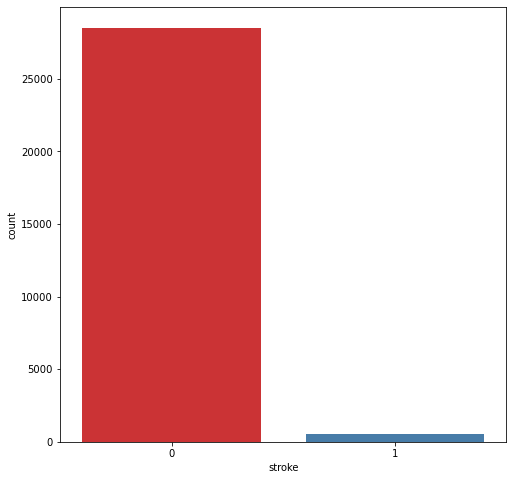

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(data=train, x='stroke', palette="Set1");

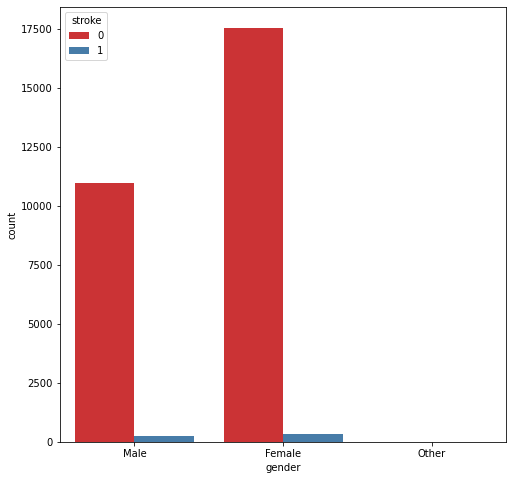

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(data=train, x='gender',hue='stroke', palette="Set1");

In [27]:
train.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

In [28]:
train.groupby(['gender'])['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: smoking_status, dtype: int64

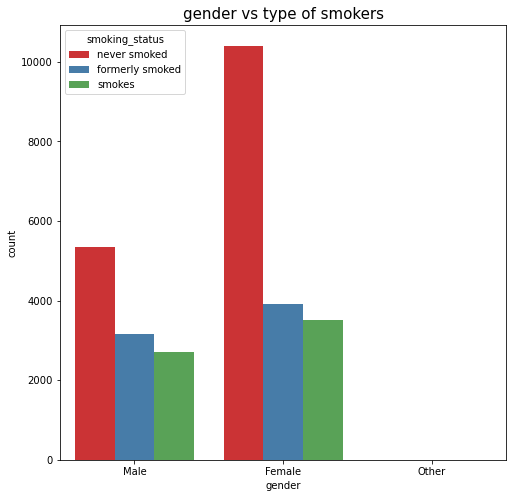

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(data=train, x='gender', hue='smoking_status',palette='Set1');
plt.title("gender vs type of smokers", fontsize=15)
plt.show()

In [30]:
train_str=train.select_dtypes(include='object')
train_int=train.select_dtypes(include=['int','float'])

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
lb=LabelEncoder()

In [33]:
features=train_str.apply(lb.fit_transform)
features=features.join(train_int)

In [34]:
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [35]:
str_dt=test.select_dtypes(include=['object'])
str_int=test.select_dtypes(include=['int','float'])

In [36]:
features1=str_dt.apply(lb.fit_transform)
features1=features1.join(str_int)

In [37]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 1 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29072 non-null  int32  
 1   ever_married       29072 non-null  int32  
 2   work_type          29072 non-null  int32  
 3   Residence_type     29072 non-null  int32  
 4   smoking_status     29072 non-null  int32  
 5   id                 29072 non-null  int64  
 6   age                29072 non-null  float64
 7   hypertension       29072 non-null  int64  
 8   heart_disease      29072 non-null  int64  
 9   avg_glucose_level  29072 non-null  float64
 10  bmi                29072 non-null  float64
 11  stroke             29072 non-null  int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 3.3 MB


In [38]:
X=features.drop(['stroke'],axis=1)

In [39]:
y=features['stroke']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [42]:
X_train.shape

(19478, 11)

In [43]:
X_test.shape


(9594, 11)

## m1 = 'Logistic Regression'

In [44]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[9432    0]
 [ 162    0]]


Accuracy of Logistic Regression: 98.31144465290807 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9432
           1       0.00      0.00      0.00       162

    accuracy                           0.98      9594
   macro avg       0.49      0.50      0.50      9594
weighted avg       0.97      0.98      0.97      9594



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
lr_tun_score= cross_val_score(lr,X_test,y_test, cv=10).mean()
lr_tun_score

0.9831145724713244

## m2=GaussianNB

In [46]:
m1 = 'GaussianNB'
gb = GaussianNB()
model = gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)
gb_conf_matrix = confusion_matrix(y_test, gb_predict)
gb_acc_score = accuracy_score(y_test, gb_predict)
print("confussion matrix")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",gb_acc_score*100,'\n')
print(classification_report(y_test,gb_predict))

confussion matrix
[[9375   57]
 [ 157    5]]


Accuracy of Logistic Regression: 97.76943923285387 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9432
           1       0.08      0.03      0.04       162

    accuracy                           0.98      9594
   macro avg       0.53      0.51      0.52      9594
weighted avg       0.97      0.98      0.97      9594



In [47]:
gb_tun_score= cross_val_score(gb,X_test,y_test, cv=10).mean()
gb_tun_score

0.9777979449078902

## m3= Knn 

In [48]:
m2 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[9428    4]
 [ 162    0]]


Accuracy of K-NeighborsClassifier: 98.26975192828851 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9432
           1       0.00      0.00      0.00       162

    accuracy                           0.98      9594
   macro avg       0.49      0.50      0.50      9594
weighted avg       0.97      0.98      0.97      9594



In [49]:
#Model Tunning
knn = KNeighborsClassifier()
knn_params={'n_neighbors':np.arange(1,50)}
knn_cv_model=GridSearchCV(knn, knn_params,cv=10).fit(X_train, y_train)

In [50]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [51]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of Tunned K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[9432    0]
 [ 162    0]]


Accuracy of Tunned K-NeighborsClassifier: 98.31144465290807 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9432
           1       0.00      0.00      0.00       162

    accuracy                           0.98      9594
   macro avg       0.49      0.50      0.50      9594
weighted avg       0.97      0.98      0.97      9594



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## m4 = 'Support Vector Classifier'

In [52]:
svc =  SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix =confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[9432    0]
 [ 162    0]]


Accuracy of Support Vector Classifier: 98.31144465290807 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9432
           1       0.00      0.00      0.00       162

    accuracy                           0.98      9594
   macro avg       0.49      0.50      0.50      9594
weighted avg       0.97      0.98      0.97      9594



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
